In [58]:
import rioxarray as rxr
import numpy as np
import codebase
import matplotlib.pyplot as plt

In [22]:
dem_filepath = '/global/scratch/users/ann_scheliga/aux_dam_datasets/'
dem_filename = 'n30w120_con.tif'

In [23]:
res_shp = codebase.load_data.load_GRanD()

In [84]:
dam_name = 'glen canyon'
subset_gpd = codebase.area_subsets.check_for_multiple_dams(dam_name,res_shp)
subset_bbox = subset_gpd.geometry.buffer(0).bounds
subset_bbox

,minx,miny,maxx,maxy
596,-111.570835,36.937778,-111.221875,37.105153


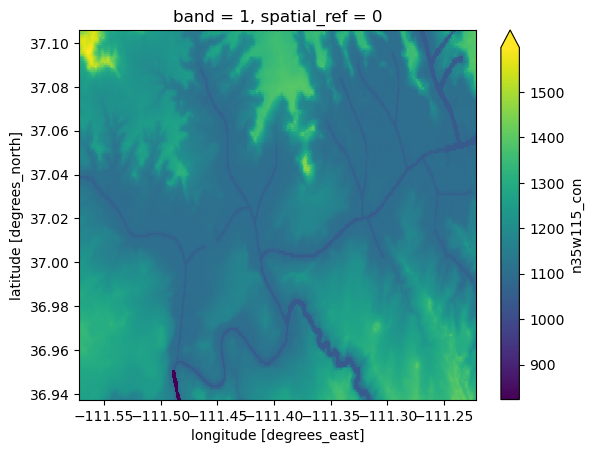

In [85]:
DEM = codebase.load_data.load_DEM_subset_as_rxrDA(subset_bbox,dem_filepath,dem_filename)
DEM_masked = DEM.where(DEM < 30000) # Lake Mead has 6 outlier pixels
DEM_masked.plot(cbar_kwargs={'extend':'max'})

In [ ]:
DEM_reproj = codebase.area_calcs.project_DA_from_crs_code(DEM_masked,54017)
DEM_reproj.plot()